In [ ]:
#3.1 Warming Up Exercises - Basic Inspection and Exploration:
#PROBLEM 1

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/jupyter/data.csv")
print(df.head())

#TASK1
print(df.info)

#TASK2
object_columns = df.select_dtypes(include='object')
print(object_columns)

print("\nUnique values in columns with dtype=object:")
for col in object_columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

null_values = df.isnull().sum()
print(null_values)

#TASK 3
numeric_df = df.select_dtypes(exclude='object')
numeric_df.to_csv('banknumericdata.csv', index=False)
print(numeric_df)

#TASK4
df = pd.read_csv('banknumericdata.csv')
summary_statistics = df.describe()
print(summary_statistics)

           x          y
0  32.502345  31.707006
1  53.426804  68.777596
2  61.530358  62.562382
3  47.475640  71.546632
4  59.813208  87.230925
<bound method DataFrame.info of             x          y
0   32.502345  31.707006
1   53.426804  68.777596
2   61.530358  62.562382
3   47.475640  71.546632
4   59.813208  87.230925
..        ...        ...
95  50.030174  81.536991
96  49.239765  72.111832
97  50.039576  85.232007
98  48.149859  66.224958
99  25.128485  53.454394

[100 rows x 2 columns]>
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

[100 rows x 0 columns]

Unique values in columns with dtype=object:
x   

In [ ]:
#PROBLEM 2

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/jupyter/medical_students_dataset.csv")
print(df.head)

print(df.info())

#TASK 2
missing_values = df.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(columns_with_missing)

#TASK 3
for col in columns_with_missing.index:
    print(f"\nHandling missing values for column: {col}")

    if df[col].dtype == 'object':  # Categorical columns
        # Fill missing values with the mode (most frequent value)
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled with mode: {mode_value}")

    elif df[col].dtype in ['int64', 'float64']:  # Numerical columns
        # Check if the column is skewed using the median, otherwise use mean
        if df[col].skew() > 1:  # Skewed column
            fill_value = df[col].median()
            print(f"Column is skewed. Filled with median: {fill_value}")
        else:
            fill_value = df[col].mean()
            print(f"Filled with mean: {fill_value}")

        df[col].fillna(fill_value, inplace=True)

# Verify if missing values were handled
print("\nMissing values after filling:")
print(df.isnull().sum())


#TASK 4
duplicate_rows = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

# If there are duplicates, we can remove them
if duplicate_rows > 0:
    # Remove duplicate rows, keeping the first occurrence
    df_cleaned = df.drop_duplicates()
    print(f"Duplicate rows removed. New total rows: {df_cleaned.shape[0]}")
else:
    print("No duplicate rows found.")

<bound method NDFrame.head of        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0             1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1             2.0   NaN    Male  152.069157  47.630941          B        NaN   
2             3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3             NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4             5.0  23.0  Female         NaN  46.234173          O        NaN   
...           ...   ...     ...         ...        ...        ...        ...   
87460     87461.0  21.0  Female  178.823613  63.136732          A  19.743874   
87461     87462.0  33.0  Female  181.334903  44.650677          A  13.578920   
87462     87463.0  34.0    Male  154.612016  85.940007          A        NaN   
87463     87464.0  24.0    Male  170.084026  93.435422         AB        NaN   
87464     87465.0  21.0  Female  198.010816  97.075100        NaN        NaN   

       Te

<ipython-input-43-6ce7a92e0e18>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_value, inplace=True)
<ipython-input-43-6ce7a92e0e18>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
#3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
#Problem 1

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/jupyter/Titanic-Dataset.csv")
print(df.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [ ]:
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

fare_mean, fare_median, fare_max, fare_min

(75.42776666666667, 72.5, 82.5, 71.2833)

In [ ]:
#Problem 2
null_age_count = first_class_df['Age'].isnull().sum()
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])
null_age_count, first_class_df_cleaned.shape

(0, (3, 6))

In [ ]:
#PROBLEM 3
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/jupyter/Titanic-Dataset.csv')

print("Unique values in 'Embarked':", df['Embarked'].unique())
print("Missing values in 'Embarked':", df['Embarked'].isnull().sum())

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)
print("Missing values after filling:", df['Embarked'].isnull().sum())


port_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
df['Embarked'] = df['Embarked'].map(port_mapping)
print(df['Embarked'].unique())


df['Embarked_Code'] = df['Embarked'].map({'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2})
print(df[['Embarked', 'Embarked_Code']].head())

df.to_csv('titanic_cleaned.csv', index=False)

#TASK1 Perform one-hot encoding on Embarked
df_encoded = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
print(df_encoded.head())
df_encoded.to_csv('titanic_encoded.csv', index=False)
#TASK2
df.to_csv('titanic_with_one_hot_encoding.csv', index=False)
#TASK3
df = df.drop('Embarked', axis=1)
#TASK4
print(df.head())

Unique values in 'Embarked': ['S' 'C' 'Q' nan]
Missing values in 'Embarked': 2
Missing values after filling: 0
['Southampton' 'Cherbourg' 'Queenstown']
      Embarked  Embarked_Code
0  Southampton              2
1    Cherbourg              0
2  Southampton              2
3  Southampton              2
4  Southampton              2
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0

Missing values in 'Survived': 0
Missing values in 'Sex': 0

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-11-8949909bb32a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='pastel', ci=None)
<ipython-input-11-8949909bb32a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='pastel', ci=None)


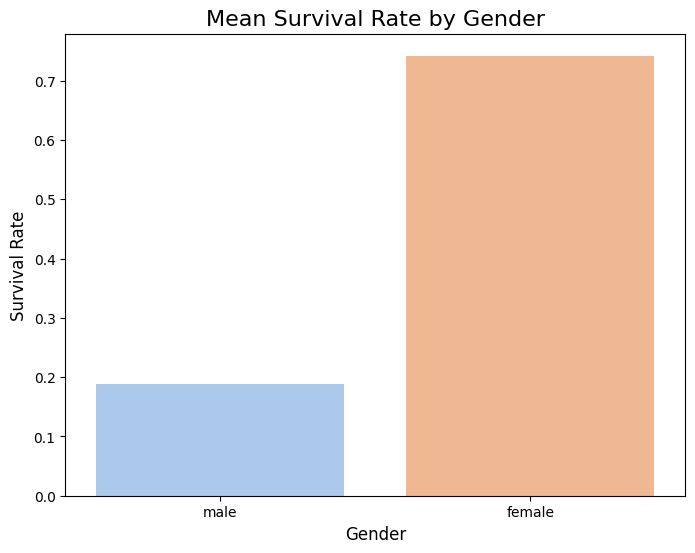

In [ ]:
#PROBELM 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/jupyter/Titanic-Dataset.csv')

print("Missing values in 'Survived':", df['Survived'].isnull().sum())
print("Missing values in 'Sex':", df['Sex'].isnull().sum())

mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("\nMean Survival Rates by Gender:")
print(mean_survival_by_gender)

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel', ci=None)

plt.title('Mean Survival Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()


Missing values in 'Survived': 0
Missing values in 'Sex': 0
Missing values in 'Embarked': 0


<ipython-input-12-a217057f1708>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


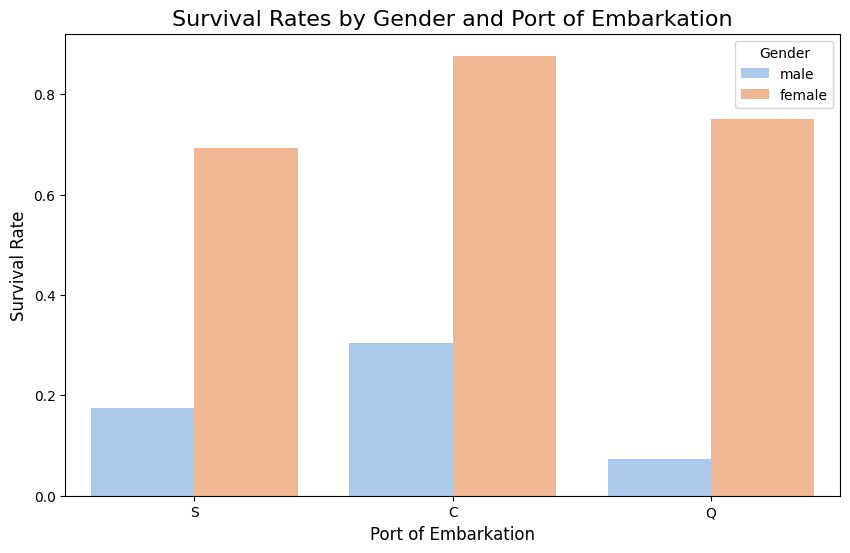

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/jupyter/Titanic-Dataset.csv')

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("Missing values in 'Survived':", df['Survived'].isnull().sum())
print("Missing values in 'Sex':", df['Sex'].isnull().sum())
print("Missing values in 'Embarked':", df['Embarked'].isnull().sum())

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Embarked',
    y='Survived',
    hue='Sex',
    data=df,
    palette='pastel',
    ci=None
)

plt.title('Survival Rates by Gender and Port of Embarkation', fontsize=16)
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend(title='Gender', loc='upper right')

plt.show()
